In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
class GuardBehavior:
    
    def __init__(self, data_path):
        self.guard_icons = {'<': (0,-1),'^':(-1,0),'>':(0,+1),'v':(+1,0)}
        self.data_path = data_path
        self.read_data()
        print ("map dimensions:",self.df_map.shape)
        self.find_guard()
        self.guard_vector = self.guard_icons[self.guard]
        self.guard_on_map = self.in_bounds()
        self.guard_path = self.find_guard_path()
        self.unique_pos = set(self.guard_path)
        print (f'Size of guard path was {len(self.unique_pos)}')
        self.display_path()

    def read_data(self):
        with open(self.data_path, 'r') as file:
            data = []
            for line in file:
                data.append(list(line.strip()))
            df_map=pd.DataFrame(data)
        self.df_map = df_map

    def find_guard(self):
        self.guard_loc = list(zip(*self.df_map.isin(self.guard_icons.keys()).to_numpy().nonzero()))[0]
        self.guard = self.df_map.iloc[self.guard_loc]

    def guard_turn(self):
        keys_list = list(self.guard_icons.keys())
        index = keys_list.index(self.guard)
        if index in [0,1,2]:
            self.guard = keys_list[index+1]
        else:
            self.guard = keys_list[0]

    def find_next_loc(self):
        next_loc = tuple(a + b for a, b in zip(self.guard_loc,self.guard_vector))
        try:
            if self.df_map.iloc[next_loc] == '#':
                self.guard_turn()
                self.guard_vector = self.guard_icons[self.guard]                         
                next_loc = tuple(a + b for a, b in zip(self.guard_loc,self.guard_vector))
        except IndexError:
            self.guard_on_map = False
        return next_loc  
    
    def in_bounds(self):
        outer_x, outer_y = self.df_map.shape
        if any(num < 0 for num in self.guard_loc):
            return False
        if self.guard_loc[0] > outer_x or self.guard_loc[1] > outer_y:
            return False
        else:
            return True

    def find_guard_path(self):
        self.guard_path = [self.guard_loc]
        while self.guard_on_map:
            guard_next_loc = self.find_next_loc()
            self.guard_loc = guard_next_loc
            self.guard_on_map = self.in_bounds()
            
            if any(self.guard_path[i:i+2] == [self.guard_path[-1],self.guard_loc] for i in range(len(self.guard_path) -1)):
                print (f'found overlap at {self.guard_loc}')
                return self.guard_path[:-1]
                self.guard_on_map = False
            
            if self.guard_on_map:
                self.guard_path.append(self.guard_loc)
            
        return self.guard_path
    
    def display_path(self):
        mask = np.zeros_like(self.df_map, dtype=bool)
        for row, col in self.guard_path:
            mask[row, col] = True
        sns.heatmap(mask, annot=False, cbar=False)






map dimensions: (130, 130)
found overlap at (np.int64(55), np.int64(5))
Size of guard path was 5339


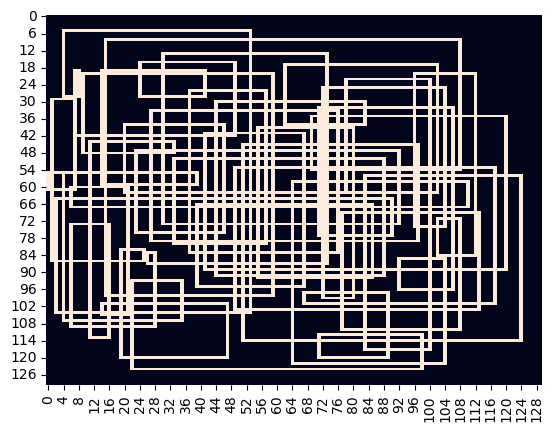

In [3]:
guard = GuardBehavior('day6.input')